# Exploratory Data Analysis of the Titanic training set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

## 1. Load the training set

In [2]:
titanic = pd.read_csv('../00_data/train.csv')

## 2. Explore features of the training set

In [3]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 2.1 Features of the dataset

In [4]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- 'Survived': survival of passenger (0 = No, 1 = Yes)
- 'Pclass': ticket class of passenger (1 = 1st, 2 = 2nd, 3 = 3rd)
- 'Name': name of passenger
- 'Sex': sex of passenger
- 'Age': age in years of passenger
- 'SibSp': # of siblings / spouses aboard the Titanic	
- 'Parch': # of parents / children aboard the Titanic	
- 'Ticket': Ticket number
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### 2.2 Missing values

In [5]:
print(titanic.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Column age and especially cabin have many missing values! We have to take this into account during further investigations and ml model development.

### 2.3 Statistics of features with numerical values

In [6]:
print(titanic[['Age', 'SibSp', 'Parch', 'Fare']].describe())

              Age       SibSp       Parch        Fare
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208
std     14.526497    1.102743    0.806057   49.693429
min      0.420000    0.000000    0.000000    0.000000
25%     20.125000    0.000000    0.000000    7.910400
50%     28.000000    0.000000    0.000000   14.454200
75%     38.000000    1.000000    0.000000   31.000000
max     80.000000    8.000000    6.000000  512.329200


## 3. Questions for EDA

In the following the Titanic training set will be analyzed regarding the following questions:
- How many passengers survived in total, how many died?
- How many male and how many female passengers survived?
- How many passengers in 1st, 2nd, and 3rd class survived?
- How many male and how many female passengers in 1st, 2nd, and 3rd class survived?
- Are passengers with higher rank (a title in Name) more likely to survive?
- How is the distribution of age for those passengers that survived and those who died?
- Are passengers with siblings / spouses aboard more likely to survive or not?
- Are passengers with children / parents aboard more likely to survive or not?

### 3.1 How many passengers survived, how many died?

In [7]:
print(titanic['Survived'].value_counts())
print(titanic['Survived'].value_counts(normalize=True))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


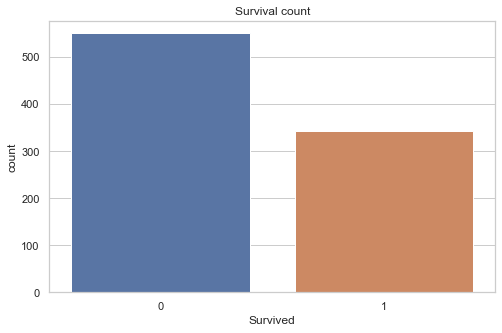

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(data=titanic, x='Survived')
plt.title('Survival count')
plt.show()

###  3.2 How many male and how many female passengers survived?

In [9]:
print(titanic['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


In [10]:
sex_survived = pd.crosstab(titanic['Sex'], titanic['Survived'])
print(sex_survived)

Survived    0    1
Sex               
female     81  233
male      468  109


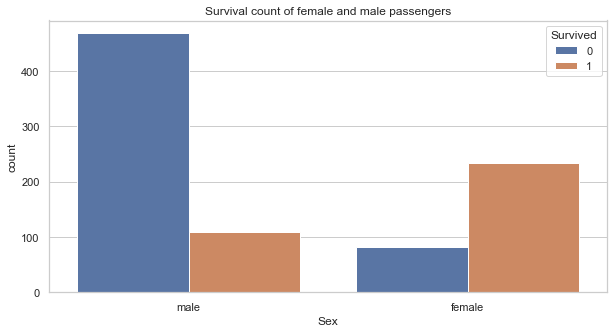

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title('Survival count of female and male passengers')
plt.show()

Obviously the female passengers had a much better chance to survive than the male passengers.

### 3.2 How many passengers in 1st, 2nd, and 3rd class survived?

In [12]:
class_survived = pd.crosstab(titanic['Pclass'], titanic['Survived'])
print(class_survived)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


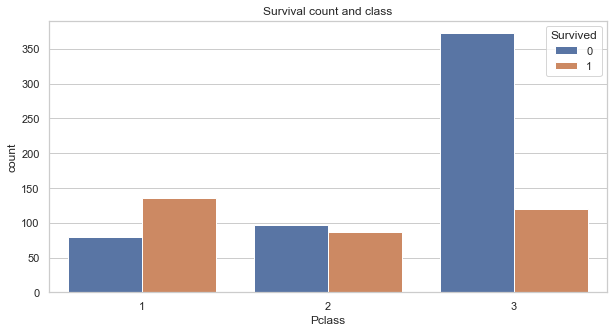

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title('Survival count and class')
plt.show()

The passengers in first class were more likely to survive than the ones in the other two classes. The most passengers who died came from third class.

### 3.3 How is the distribution of age for those passengers that survived and those who died?

In [14]:
age_survived = pd.crosstab(titanic['Age'], titanic['Survived'])
print(age_survived)

Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  2
0.83      0  2
0.92      0  1
...      .. ..
70.00     2  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[88 rows x 2 columns]


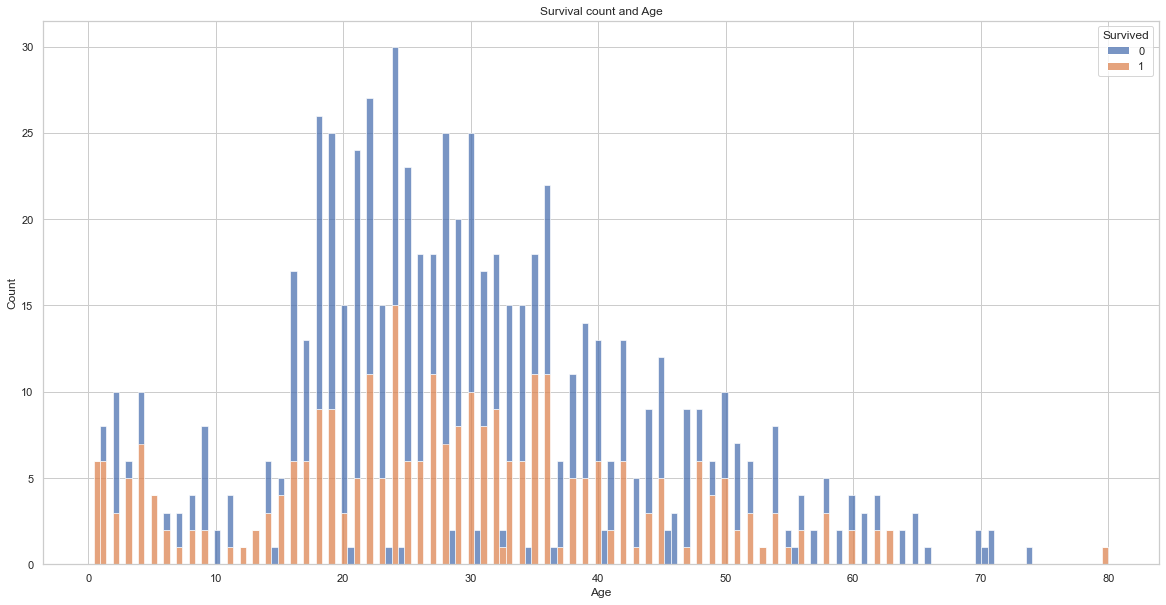

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=160, multiple='stack', ax=ax)
plt.title('Survival count and Age')
plt.show()

Age doesn't seem to have a great impact on how a passenger survived or not. Exception are babies under 1 year, who all survived. 

### 3.4 Family size and survival 

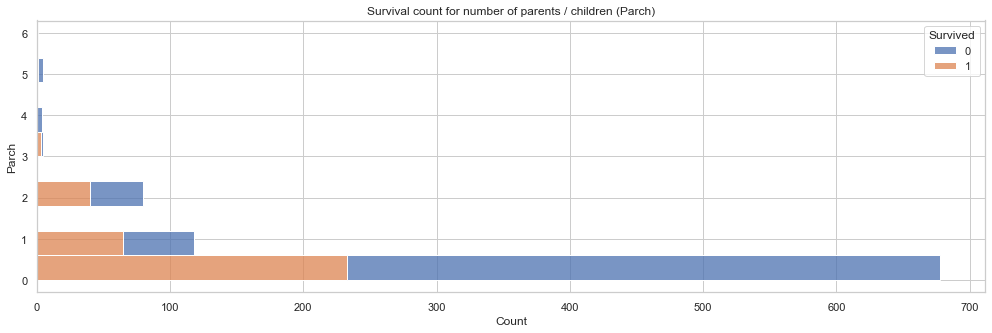

In [16]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.histplot(data=titanic, y='Parch', ax=ax, multiple='stack', hue='Survived', bins=10)
plt.title('Survival count for number of parents / children (Parch)')
plt.show()

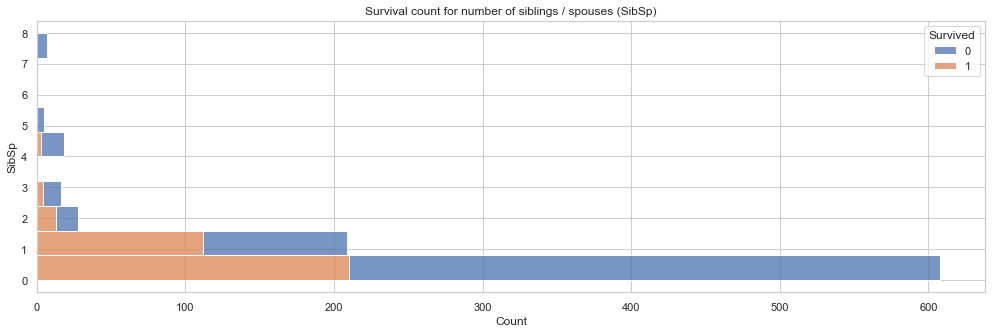

In [17]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.histplot(data=titanic, y='SibSp', ax=ax, hue='Survived', multiple='stack', bins=10)
plt.title('Survival count for number of siblings / spouses (SibSp)')
plt.show()

In [18]:
print(pd.crosstab(titanic['Parch'], titanic['Survived']))

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


In [19]:
print(pd.crosstab(titanic['SibSp'], titanic['Survived']))

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


It seems, that the best chances to survive had passengers who travelled with 1 or 2 relatives, whereas bigger family size is rather an indicator for not surviving the desaster.

#### Family Size and Class

An explanation for the relationship between family size and survival as displayed above might be, that bigger families travelled rather in third class and had therefore a smaller chance to survive than passengers in first and second class (this relationship was already figured out earlier). Let's see, if this hypothesis proves right.

In [20]:
print(pd.crosstab(titanic['Parch'], titanic['Pclass']))

Pclass    1    2    3
Parch                
0       163  134  381
1        31   32   55
2        21   16   43
3         0    2    3
4         1    0    3
5         0    0    5
6         0    0    1


In [21]:
print(pd.crosstab(titanic['SibSp'], titanic['Pclass']))

Pclass    1    2    3
SibSp                
0       137  120  351
1        71   55   83
2         5    8   15
3         3    1   12
4         0    0   18
5         0    0    5
8         0    0    7


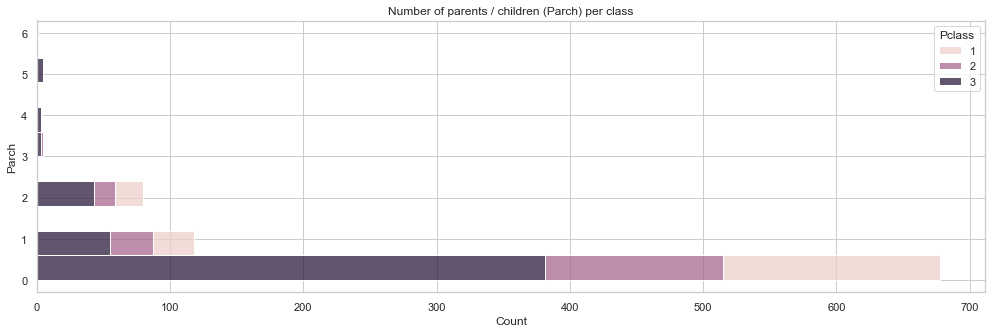

In [22]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.histplot(data=titanic, y='Parch', ax=ax, multiple='stack', hue='Pclass', bins=10)
plt.title('Number of parents / children (Parch) per class')
plt.show()

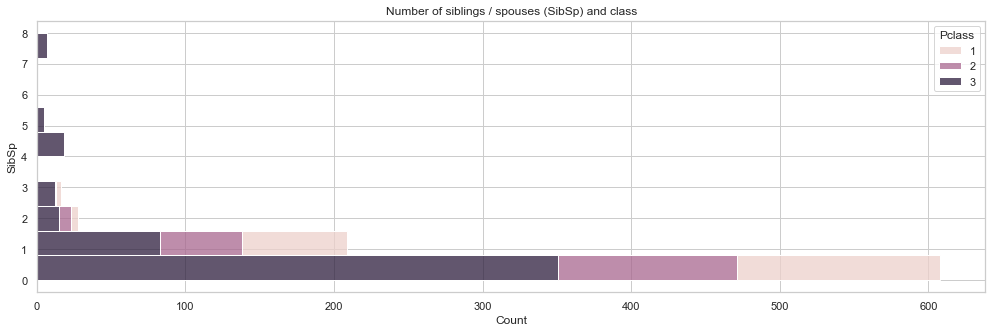

In [23]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.histplot(data=titanic, y='SibSp', ax=ax, hue='Pclass', multiple='stack', bins=10)
plt.title('Number of siblings / spouses (SibSp) and class')
plt.show()

In [24]:
print(titanic.groupby(['Parch', 'Pclass', 'Survived']).count()['PassengerId'])

Parch  Pclass  Survived
0      1       0            64
               1            99
       2       0            86
               1            48
       3       0           295
               1            86
1      1       0            10
               1            21
       2       0             8
               1            24
       3       0            35
               1            20
2      1       0             5
               1            16
       2       0             3
               1            13
       3       0            32
               1            11
3      2       1             2
       3       0             2
               1             1
4      1       0             1
       3       0             3
5      3       0             4
               1             1
6      3       0             1
Name: PassengerId, dtype: int64


In [25]:
print(titanic.groupby(['SibSp', 'Pclass', 'Survived']).count()['PassengerId'])

SibSp  Pclass  Survived
0      1       0            60
               1            77
       2       0            70
               1            50
       3       0           268
               1            83
1      1       0            18
               1            53
       2       0            23
               1            32
       3       0            56
               1            27
2      1       0             1
               1             4
       2       0             4
               1             4
       3       0            10
               1             5
3      1       0             1
               1             2
       2       1             1
       3       0            11
               1             1
4      3       0            15
               1             3
5      3       0             5
8      3       0             7
Name: PassengerId, dtype: int64


As we can see, the hypothesis that bigger families travelled mostly in third class and therefore died more often in the desaster is right. So in general the features Parch and SibSp implicate Pclass.